In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as regex
import re
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [2]:
bbchealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\bbchealth.txt'
cbchealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\cbchealth.txt'
cnnhealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\cnnhealth.txt'
everydayhealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\everydayhealth.txt'
foxnewshealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\foxnewshealth.txt'
gdnhealthcare = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\gdnhealthcare.txt'
goodhealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\goodhealth.txt'
KaiserHealthNews = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\KaiserHealthNews.txt'
latimeshealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\latimeshealth.txt'
msnhealthnews = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\msnhealthnews.txt'
NBChealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\NBChealth.txt'
nprhealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\nprhealth.txt'
nytimeshealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\nytimeshealth.txt'
reuters_health = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\reuters_health.txt'
usnewshealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\usnewshealth.txt'
wsjhealth = 'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\wsjhealth.txt'

In [3]:
filenames = [bbchealth, cbchealth, cnnhealth, everydayhealth, foxnewshealth, gdnhealthcare, goodhealth, KaiserHealthNews,
            latimeshealth, msnhealthnews, NBChealth, nprhealth, nytimeshealth, reuters_health, usnewshealth, wsjhealth]
with open('C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\allaccounts.txt', 'w', encoding = 'Latin-1') as outfile:
    for fname in filenames:
        with open(fname, encoding = 'Latin-1') as infile:
            for line in infile:
                outfile.write(line)

In [4]:
allaccounts = pd.read_csv("C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\allaccounts.txt", sep="|", header=None, error_bad_lines=False, encoding = 'Latin-1')

b'Skipping line 3929: expected 3 fields, saw 5\nSkipping line 4774: expected 3 fields, saw 4\nSkipping line 4832: expected 3 fields, saw 4\nSkipping line 4842: expected 3 fields, saw 4\nSkipping line 5192: expected 3 fields, saw 4\nSkipping line 5197: expected 3 fields, saw 4\nSkipping line 5221: expected 3 fields, saw 4\nSkipping line 5276: expected 3 fields, saw 4\nSkipping line 5358: expected 3 fields, saw 4\nSkipping line 5414: expected 3 fields, saw 4\nSkipping line 5638: expected 3 fields, saw 4\nSkipping line 6627: expected 3 fields, saw 4\nSkipping line 6656: expected 3 fields, saw 4\nSkipping line 6928: expected 3 fields, saw 4\nSkipping line 9091: expected 3 fields, saw 4\nSkipping line 9130: expected 3 fields, saw 4\nSkipping line 9137: expected 3 fields, saw 4\nSkipping line 9176: expected 3 fields, saw 4\nSkipping line 9216: expected 3 fields, saw 4\nSkipping line 9397: expected 3 fields, saw 4\nSkipping line 9407: expected 3 fields, saw 4\nSkipping line 9411: expected 3 f

In [5]:
list1 = allaccounts[2].values.tolist()

In [6]:
#Text Cleaning

# Removing Mentions
import re
list2=[]
for i in list1:
    list2.append(re.sub(r'@[A-Za-z0-9]+','', i))
    
# Removing Hashtags
list3=[]
for i in list2:
    list3.append(re.sub(r'#([^\s]+)', r'\1', i))
    
# Removing Hyperlinks
list4 = []
for i in list3:
    list4.append(re.sub(r'http\S+', '', i))
    
# Expanding contractions
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
v = ' \n '.join(list4)
list5 = decontracted(v)
list6 = list5.split(" \n ")

# Removing punctuations and numbers
list7 = []
for i in list6:
    list7.append(re.sub(r"[^a-zA-Z]", ' ', i))
    
# Upper Case to Lower Case
list8 =[x.lower() for x in list7]
list8

# Tokenization
tknzr = TweetTokenizer()
alltokens = []
for i in list8:
    tokens = tknzr.tokenize(i)
    alltokens.append(tokens)
alltokens

#Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
lemmatize_tweets = []
for i in alltokens:
    lemmatize_words = []
    for j in i:
        lemmatized = wordnet_lemmatizer.lemmatize(j)
        lemmatize_words.append(lemmatized)
    lemmatize_tweets.append(lemmatize_words)
lemmatize_tweets

# Joining Tweets
processed_tweets = []
for i in lemmatize_tweets:
    joined_tweets = ' '.join(map(str, i))
    processed_tweets.append(joined_tweets)
processed_tweets

['breast cancer risk test devised',
 'gp workload harming care bma poll',
 'short people is heart risk greater',
 'new approach against hiv promising',
 'coalition undermined nh doctor',
 'review of case against nh manager',
 'video all day is empty what am i going to do',
 'video overhaul needed for end of life care',
 'care for dying need overhaul',
 'video nh labour and tory key policy',
 'have gp service got worse',
 'a amp e waiting hit new worst level',
 'party row over gp opening hour',
 'why strenuous run may not be so bad after all',
 'video health surcharge for non eu patient',
 'video skin cancer spike from s holiday',
 'amight die in future outbreak',
 'skin cancer linked to holiday boom',
 'public back tax rise to fund nh',
 'video welcome to the designer asylum',
 'video why are we having le sex',
 'five idea to transform the nh',
 'personal cancer vaccine exciting',
 'child heart surgery death halved',
 'video miliband cameron failed the nh',
 'unsafe food growing global

In [7]:
foovec = TfidfVectorizer(min_df = 5, max_df = 0.99, tokenizer=nltk.word_tokenize, ngram_range = (1,1), stop_words = 'english', max_features = 500)

In [8]:
processed_tweets_tfidf = foovec.fit_transform(processed_tweets)
processed_tweets_tfidf.shape

(62813, 500)

In [9]:
x = foovec.vocabulary_
x

{'breast': 45,
 'cancer': 53,
 'risk': 367,
 'test': 435,
 'care': 54,
 'people': 317,
 'heart': 198,
 'new': 294,
 'hiv': 204,
 'nh': 296,
 'doctor': 113,
 'review': 364,
 'case': 56,
 'video': 466,
 'day': 94,
 'going': 175,
 'end': 133,
 'life': 242,
 'need': 293,
 'key': 227,
 'policy': 322,
 'service': 387,
 'got': 177,
 'amp': 15,
 'e': 124,
 'hit': 203,
 'worst': 494,
 'level': 240,
 'hour': 211,
 'run': 370,
 'bad': 27,
 'health': 193,
 'patient': 315,
 'skin': 396,
 's': 372,
 'holiday': 206,
 'die': 107,
 'future': 167,
 'outbreak': 311,
 'linked': 247,
 'public': 341,
 'tax': 430,
 'rise': 366,
 'having': 190,
 'le': 235,
 'sex': 389,
 'idea': 214,
 'vaccine': 463,
 'child': 66,
 'surgery': 421,
 'death': 97,
 'food': 162,
 'global': 173,
 'fast': 148,
 'hospital': 209,
 'sleep': 397,
 'drug': 122,
 'eye': 143,
 'treatment': 451,
 'blood': 39,
 'plan': 320,
 'good': 176,
 'pain': 312,
 'offer': 305,
 'm': 264,
 'hope': 208,
 'nursing': 300,
 'fight': 156,
 'seek': 385,
 'men

In [10]:
import operator
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
sorted_x

[('abortion', 0),
 ('aca', 1),
 ('actually', 2),
 ('add', 3),
 ('adult', 4),
 ('advice', 5),
 ('affect', 6),
 ('africa', 7),
 ('age', 8),
 ('aging', 9),
 ('aid', 10),
 ('alcohol', 11),
 ('allergy', 12),
 ('alzheimer', 13),
 ('american', 14),
 ('amp', 15),
 ('answer', 16),
 ('anti', 17),
 ('antibiotic', 18),
 ('approves', 19),
 ('ask', 20),
 ('attack', 21),
 ('autism', 22),
 ('avoid', 23),
 ('away', 24),
 ('b', 25),
 ('baby', 26),
 ('bad', 27),
 ('ban', 28),
 ('beauty', 29),
 ('benefit', 30),
 ('best', 31),
 ('better', 32),
 ('big', 33),
 ('billion', 34),
 ('bird', 35),
 ('birth', 36),
 ('black', 37),
 ('blog', 38),
 ('blood', 39),
 ('body', 40),
 ('boost', 41),
 ('boy', 42),
 ('brain', 43),
 ('breakfast', 44),
 ('breast', 45),
 ('burn', 46),
 ('buy', 47),
 ('c', 48),
 ('california', 49),
 ('calorie', 50),
 ('canada', 51),
 ('canadian', 52),
 ('cancer', 53),
 ('care', 54),
 ('cartoon', 55),
 ('case', 56),
 ('cause', 57),
 ('cdc', 58),
 ('cell', 59),
 ('challenge', 60),
 ('chance', 61),


In [11]:
new_list=[]
for i in range(len(sorted_x)):
    new_list.append(sorted_x[i][0])
new_list

['abortion',
 'aca',
 'actually',
 'add',
 'adult',
 'advice',
 'affect',
 'africa',
 'age',
 'aging',
 'aid',
 'alcohol',
 'allergy',
 'alzheimer',
 'american',
 'amp',
 'answer',
 'anti',
 'antibiotic',
 'approves',
 'ask',
 'attack',
 'autism',
 'avoid',
 'away',
 'b',
 'baby',
 'bad',
 'ban',
 'beauty',
 'benefit',
 'best',
 'better',
 'big',
 'billion',
 'bird',
 'birth',
 'black',
 'blog',
 'blood',
 'body',
 'boost',
 'boy',
 'brain',
 'breakfast',
 'breast',
 'burn',
 'buy',
 'c',
 'california',
 'calorie',
 'canada',
 'canadian',
 'cancer',
 'care',
 'cartoon',
 'case',
 'cause',
 'cdc',
 'cell',
 'challenge',
 'chance',
 'change',
 'chat',
 'check',
 'chicken',
 'child',
 'china',
 'choice',
 'cigarette',
 'city',
 'clinic',
 'coffee',
 'cold',
 'come',
 'coming',
 'common',
 'community',
 'company',
 'concern',
 'concussion',
 'consumer',
 'control',
 'cost',
 'country',
 'court',
 'coverage',
 'crisis',
 'cure',
 'cut',
 'd',
 'daily',
 'dallas',
 'data',
 'day',
 'deadly',

In [12]:
f2=(open(r'C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\tfidfvectors.csv', 'w', newline=''))
writer = csv.writer(f2)
header_row = new_list
writer.writerow(header_row)
p = processed_tweets_tfidf.toarray()
for i in range(len(p)):
    writer.writerow(p[i])

In [14]:
# Machine Learning
df = pd.read_csv('C:\\Users\\saumi\\Desktop\\Saumil Shah\\UIUC\\Fall 2018\\Machine Learning Team Projects\\Assignment 1\\Health Tweets\\tfidfvectors.csv', encoding = "ISO-8859-1")
df.head()

,abortion,aca,actually,add,adult,advice,affect,africa,age,aging,...,worker,working,workout,world,worst,year,yes,yoga,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X = df.iloc[:,0:499]
X = StandardScaler().fit_transform(X)

In [16]:
pca = PCA(0.90)
pca.fit(X)
pca.n_components_

425

In [17]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.00480383, 0.00426582, 0.00413543, 0.00383599, 0.0037316 ])

In [18]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

,0,1,2,3,4
0,0.860156,-3.205192,-2.055753,-0.841928,-1.487053
1,0.432662,-0.464750,1.821862,0.575203,-0.500617
2,-0.126284,-1.900821,-1.371731,-0.699230,-0.911796
3,0.751034,-1.117819,-0.335073,0.767164,0.526822
4,0.399730,0.251134,0.481232,0.792351,-0.085450


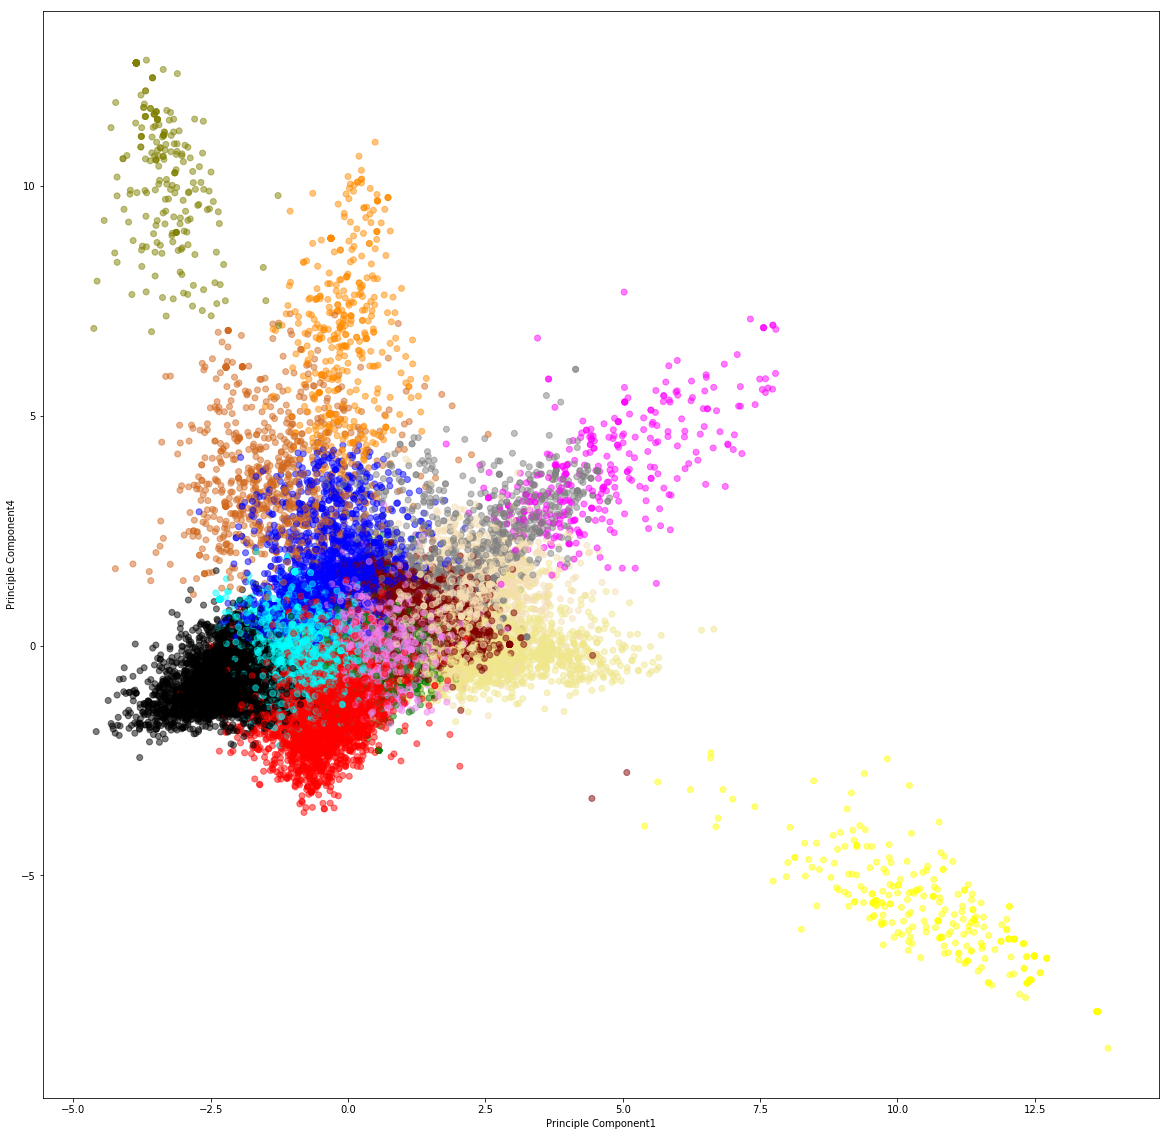

In [20]:
kmeans = KMeans(n_clusters = 16)
#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(principalComponents)

#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'blue' , 3:'yellow', 4: 'violet' , 5: 'black', 6:'darkorange', 7: 'olive', 
                  8: 'chocolate', 9:'magenta', 10: 'maroon', 11: 'cyan', 12:'khaki', 13: 'grey', 14: 'wheat', 15: 'red'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter diagram
plt.figure(figsize = (20,20))
plt.scatter(principalComponents[:,1],principalComponents[:,4], c= label_color, alpha=0.5) 
plt.xlabel('Principle Component1')
plt.ylabel('Principle Component4')
plt.show()